In [1]:
import csv
import os
import pandas as pd
import matplotlib.pyplot as plt
import ast
import matplotlib.cm as cm
import numpy as np



In [2]:
df1 = pd.read_csv("PrivacyPolicies_df_all_nona_linkcount.csv") # reading in link lists

for index, row in df1.iterrows():
    if type(df1.at[index, "all_links"]) == float:
        df1.at[index, 'all_links'] = [df1.at[index, "all_links"]]
    elif type(df1.at[index, "all_links"]) == str:
        df1.at[index, 'all_links'] = ast.literal_eval(df1.at[index, 'all_links'])
    else:
        continue




In [3]:
num_links = []

for index, row in df1.iterrows():
    list_of_links = df1.at[index, "all_links"]
    has_nan = any(pd.isna(item) for item in list_of_links)
    if has_nan and len(list_of_links) == 1:
        length = 0
        num_links.append(length)
    else:
        length = len(list_of_links)
        num_links.append(length)

df1.insert(0, 'link_count', num_links) # inserts link count column



In [4]:
newdf = df1.groupby(['categories', 'year']).mean("link_count").reset_index() # updates link count column to reflect mean

# newdf.to_csv('counting_links_first_chunk.csv', index=True)

In [5]:
list_of_filtered_dfs = []

Adult = newdf[newdf['categories'] == 'adult']
list_of_filtered_dfs.append(Adult)

Education_Entertainment = newdf[newdf['categories'] == 'education;entertainment']
list_of_filtered_dfs.append(Education_Entertainment)

Business_Shopping = newdf[newdf['categories'] == 'business;shopping']
list_of_filtered_dfs.append(Business_Shopping)

Entertainment_Business = newdf[newdf['categories'] == 'business;entertainment']
list_of_filtered_dfs.append(Entertainment_Business)

Education = newdf[newdf['categories'] == 'education']
list_of_filtered_dfs.append(Education)

Uncategorized = newdf[newdf['categories'] == 'uncategorized']
list_of_filtered_dfs.append(Uncategorized)

Education_Business = newdf[newdf['categories'] == 'business;education']
list_of_filtered_dfs.append(Education_Business)

Education_Health = newdf[newdf['categories'] == 'education;health']
list_of_filtered_dfs.append(Education_Health)

Parked = newdf[newdf['categories'] == 'parked']
list_of_filtered_dfs.append(Parked)

InfoTech = newdf[newdf['categories'] == 'informationtech']
list_of_filtered_dfs.append(InfoTech)

Entertainment = newdf[newdf['categories'] == 'entertainment']
list_of_filtered_dfs.append(Entertainment)

Games = newdf[newdf['categories'] == 'games']
list_of_filtered_dfs.append(Games)

Travel_Business = newdf[newdf['categories'] == 'business;travel']
list_of_filtered_dfs.append(Travel_Business)

Business_Entertainment_Education = newdf[newdf['categories'] == 'business;education;entertainment']
list_of_filtered_dfs.append(Business_Entertainment_Education)

Education_InfoTech_Business = newdf[newdf['categories'] == 'business;education;informationtech']
list_of_filtered_dfs.append(Education_InfoTech_Business)

Business_InfoTech = newdf[newdf['categories'] == 'business;informationtech']
list_of_filtered_dfs.append(Business_InfoTech)

Business = newdf[newdf['categories'] == 'business']
list_of_filtered_dfs.append(Business)

Shopping = newdf[newdf['categories'] == 'shopping']
list_of_filtered_dfs.append(Shopping)

Business_Economy_Finance = newdf[newdf['categories'] == 'business;economyandfinance']
list_of_filtered_dfs.append(Business_Economy_Finance)

Sports = newdf[newdf['categories'] == 'sports']
list_of_filtered_dfs.append(Sports)



C:\Users\pp\AppData\Local\Temp\ipykernel_14392\1571457285.py:6: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = cm.get_cmap('tab20', num_colors)


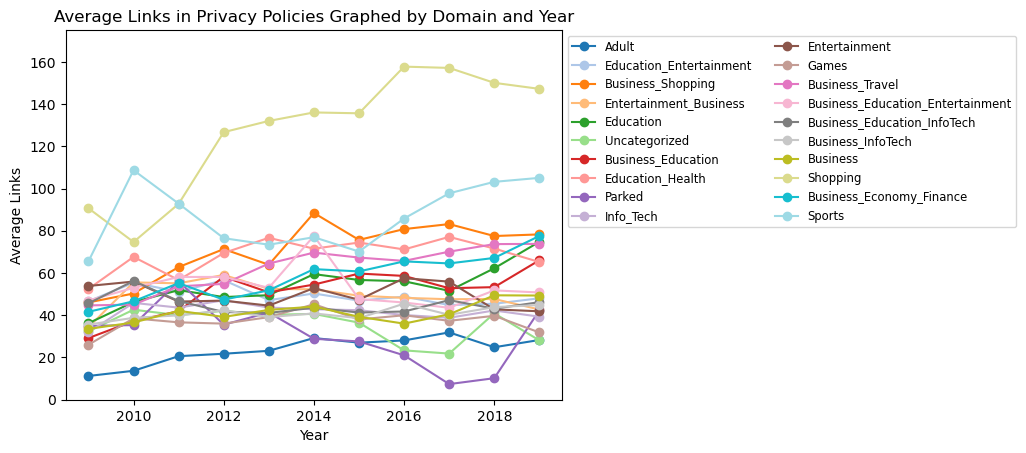

In [6]:
global_min = 0
global_max = 175

num_colors = 20

cmap = cm.get_cmap('tab20', num_colors)
colors = [cmap(i) for i in range(num_colors)]

domain_label = ['Adult', 'Education_Entertainment', 'Business_Shopping', 'Entertainment_Business', 'Education', 'Uncategorized', 'Business_Education', 'Education_Health', 'Parked', 'Info_Tech', 'Entertainment', 'Games', 'Business_Travel', 'Business_Education_Entertainment', 'Business_Education_InfoTech', 'Business_InfoTech', 'Business', 'Shopping', 'Business_Economy_Finance', 'Sports']

for i, item in enumerate(list_of_filtered_dfs):
    year = item['year']
    counts = item['link_count']
    label = f'{domain_label[i % len(domain_label)]}'
    plt.plot(year, counts, marker='o', linestyle= '-', color=colors[i % num_colors], label=label)

plt.title('Average Links in Privacy Policies Graphed by Domain and Year')
plt.xlabel('Year')
plt.ylabel('Average Links')
plt.ylim(global_min, global_max)
plt.legend(loc='upper left', bbox_to_anchor=(1, 1), ncol=2, fontsize='small')
plt.show()